In [84]:
df_fb = pd.DataFrame()
df_fb['dateandTime'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour', 'minute']])
df_fb['y'] = df_cleaned['dischargePah']
df_fb

,dateandTime,y
0,2022-12-28 00:00:00,5.1
1,2022-12-28 00:01:00,4.9
2,2022-12-28 00:03:00,4.8
3,2022-12-28 00:04:00,5.0
4,2022-12-28 00:06:00,5.0
...,...,...
19228,2023-01-19 07:37:00,5.0
19229,2023-01-19 07:39:00,5.2
19230,2023-01-19 07:40:00,5.2
19231,2023-01-19 07:42:00,5.0


MSE: 0.07118369842629621, MAE: 0.2164073523140434


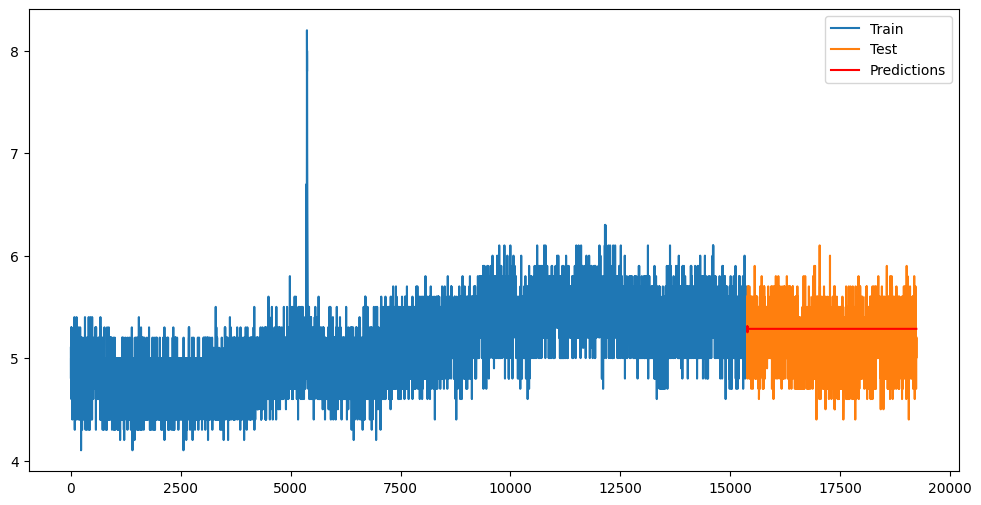

In [85]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# Define the target variable
y = df_fb['y']

# Split the data into training and testing sets (80-20 split)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) order can be adjusted
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)
print(f'MSE: {mse}, MAE: {mae}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend()
plt.show()


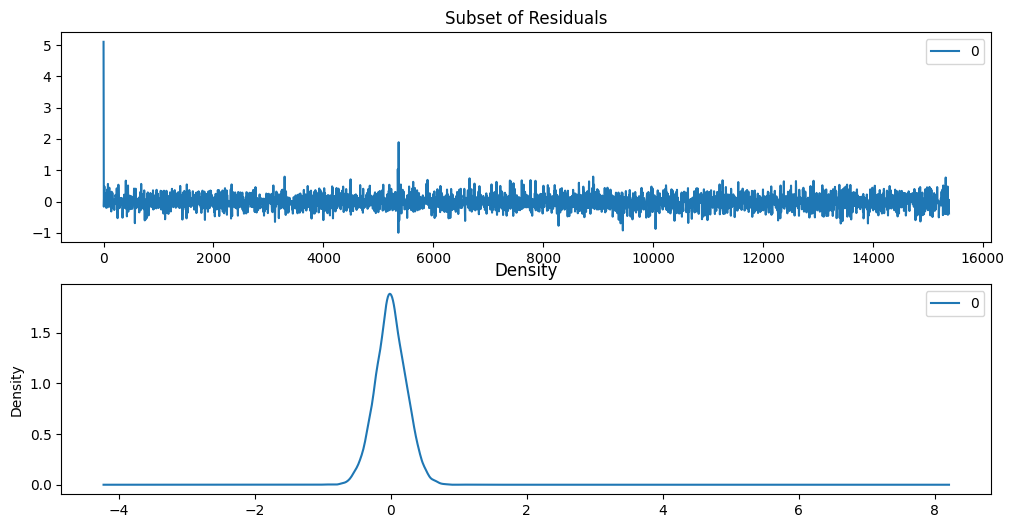

In [83]:
# Plot a subset of residuals (e.g., every 10th residual)
residuals_subset = residuals[::5]

plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals_subset.plot(title="Subset of Residuals", ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', title='Density', ax=plt.gca())
plt.show()
